# surface


In [8]:
# Read the file
data = []
with open('kn.her2.all', 'r') as file:
    for line in file:
        parts = line.split()
        pair = parts[0]
        dde = float(parts[1])
        de1 = float(parts[3])
        de2 = float(parts[4])
        data.append((pair, dde, de1, de2))

for i, row in enumerate(data):
    pair, dde, de1, de2 = row
    de12 = dde + de1 + de2
    data[i] = (pair, dde, de1, de2, de12)


In [9]:
data

[('A1B-B2A', 0.012168, -8.38054968975, -12.211337151, -20.579718840749997),
 ('A1B-B2C', -0.000907891, -8.38054968975, -8.17965538055, -16.5611129613),
 ('A1B-B2D', 0.000124631, -8.38054968975, -8.33986726217, -16.72029232092),
 ('A1B-A3B', 0.00878509, -8.38054968975, -6.41973451525, -14.791499115),
 ('A1B-A3C', 0.00893699, -8.38054968975, -5.49322355539, -13.864836255139998),
 ('A1B-A3D', 0.00987412, -8.38054968975, -9.96717477869, -18.33785034844),
 ('A1B-A4B', 0.000848137, -8.38054968975, -8.36709472165, -16.746796274399998),
 ('A1B-A4C', 0.000388086, -8.38054968975, -8.3004519064, -16.68061351015),
 ('A1B-A4D', 0.000465672, -8.38054968975, -8.35169317573, -16.73177719348),
 ('A1B-A5B', -7.491e-05, -8.38054968975, -8.17220654339, -16.55283114314),
 ('A1B-A5C', 0.000256306, -8.38054968975, -8.27075589634, -16.65104928009),
 ('A1B-A5D', 0.000659778, -8.38054968975, -8.31584165618, -16.69573156793),
 ('A1B-B6A', 0.00518208, -8.38054968975, -9.06889346242, -17.44426107217),
 ('A1B-B6C',

In [10]:
position_de = {}
for row in data:
    pair, dde, de1, de2, de12 = row
    pos1, pos2 = pair.split('-')
    pos1 = ''.join(filter(str.isdigit, pos1))  # Extract position number(s)
    pos2 = ''.join(filter(str.isdigit, pos2))
    
    if pos1 not in position_de:
        position_de[pos1] = []
    position_de[pos1].append(de1)
    
    if pos2 not in position_de:
        position_de[pos2] = []
    position_de[pos2].append(de2)

average_de = {pos: sum(values) / len(values) for pos, values in position_de.items()}

# Calculate average dde for all two positions
position_de12 = {}


for row in data:
    pair, dde, de1, de2, de12 = row
    pos1, pos2 = pair.split('-')
    pos1 = ''.join(filter(str.isdigit, pos1))  # Extract position number(s)
    pos2 = ''.join(filter(str.isdigit, pos2))
    if int(pos1) > int(pos2):
        key = (pos2, pos1)
    else:
        key = (pos1, pos2)
    if key not in position_de12:
        position_de12[key] = []
    # position_de12[key].append(de12)
    position_de12[key].append((de12, de1+de2))

# for key, values in position_de12.items():
#     print(f"Key: {key}, Values: {values}")




In [11]:
position_de12

{('1', '2'): [(-20.579718840749997, -20.59188684075),
  (-16.5611129613, -16.5602050703),
  (-16.72029232092, -16.72041695192),
  (-20.45908669522, -20.47122689522),
  (-16.44057304477, -16.43954512477),
  (-16.599786824589998, -16.59975700639),
  (-20.59366915345, -20.60625935345),
  (-16.57493202, -16.574577583),
  (-16.734314282619998, -16.73478946462)],
 ('1', '3'): [(-14.791499115, -14.800284205),
  (-13.864836255139998, -13.87377324514),
  (-18.33785034844, -18.34772446844),
  (-14.671409319470001, -14.67962425947),
  (-13.744312139609999, -13.75311329961),
  (-18.217953912909998, -18.22706452291),
  (-14.8058708177, -14.8146567177),
  (-13.879271067839998, -13.88814575784),
  (-18.35201018114, -18.36209698114)],
 ('1', '4'): [(-16.746796274399998, -16.7476444114),
  (-16.68061351015, -16.681001596149997),
  (-16.73177719348, -16.73224286548),
  (-16.62647635987, -16.626984465870002),
  (-16.560319534519998, -16.56034165062),
  (-16.6115746824, -16.611582919950003),
  (-16.760945

plot a 3d shape with pos1 as x axis, pos2 as y axis ( so each x and y corrospoinding to 9 values), the highest de12 as the shape's upper surface, and the lowest de12 as the shape's lower surface

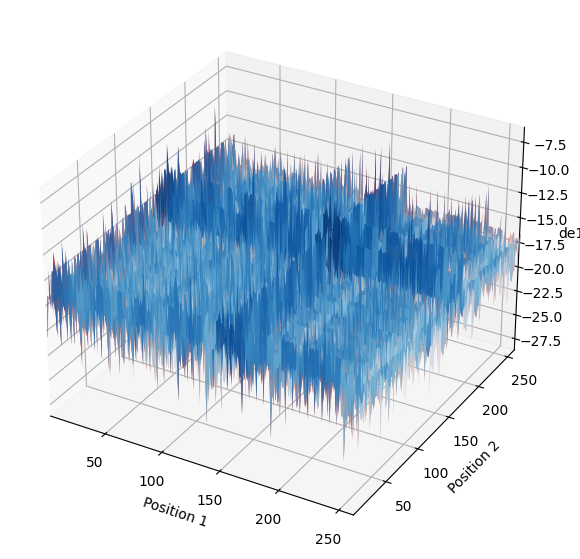

In [24]:
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
import numpy as np

import matplotlib.pyplot as plt

x_positions = [i for i in range(1, 264)]
y_positions = [j for j in range(1, 264)]

# Create a grid for x and y
x_grid, y_grid = np.meshgrid(x_positions, y_positions)

# Initialize z_upper and z_lower grids
z_upper_grid = np.full(x_grid.shape, np.nan)
z_lower_grid = np.full(x_grid.shape, np.nan)
z_reference_grid = np.full(x_grid.shape, np.nan)
z_de_abs_max_grid = np.full(x_grid.shape, np.nan)

# Populate z_upper and z_lower grids
for (pos1, pos2), de12_values in position_de12.items():
    x_idx = x_positions.index(int(pos1))
    y_idx = y_positions.index(int(pos2))
    
    z_upper_grid[y_idx, x_idx] = max(de12[0] for de12 in de12_values)
    z_lower_grid[y_idx, x_idx] = min(de12[0] for de12 in de12_values)
    z_reference_grid[y_idx, x_idx] = max(de12_values, key=lambda de12: abs(de12[0]))[1]
    z_de_abs_max_grid[y_idx, x_idx] = max(de12_values, key=lambda de12: abs(de12[0]))[0]

#mirror graph
for (pos2, pos1), de12_values in position_de12.items():
    x_idx = x_positions.index(int(pos1))
    y_idx = y_positions.index(int(pos2))
    
    z_upper_grid[y_idx, x_idx] = max(de12[0] for de12 in de12_values)
    z_lower_grid[y_idx, x_idx] = min(de12[0] for de12 in de12_values)
    z_reference_grid[y_idx, x_idx] = max(de12_values, key=lambda de12: abs(de12[0]))[1]
    z_de_abs_max_grid[y_idx, x_idx] = max(de12_values, key=lambda de12: abs(de12[0]))[0]

# Plot the 3D shape
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the upper surface with reversed Reds colormap
# surf_upper = ax.plot_surface(x_grid, y_grid, z_upper_grid, cmap='Reds_r', alpha=0.6)

# Plot the lower surface with the same colormap
# surf_lower = ax.plot_surface(x_grid, y_grid, z_lower_grid, cmap='Reds', alpha=0.6)

# Plot the reference surface with a different colormap
surf_reference = ax.plot_surface(x_grid, y_grid, z_reference_grid, cmap='Blues', alpha=0.6)

# Plot the reference surface with a different colormap
surf_reference = ax.plot_surface(x_grid, y_grid, z_de_abs_max_grid, cmap='Reds', alpha=0.6)
# Add color bars for the upper and lower surfaces
# fig.colorbar(surf_upper, ax=ax, shrink=0.5, aspect=10, label='Upper Surface de12')
# fig.colorbar(surf_lower, ax=ax, shrink=0.5, aspect=10, label='Lower Surface de12')

# Set axis labels
ax.set_xlabel('Position 1')
ax.set_ylabel('Position 2')
ax.set_zlabel('de12')

# Set x and y axis limits
ax.set_xlim(1, 262)
ax.set_ylim(1, 262)

plt.show()

In [34]:
# Create the figure
fig = go.Figure()
# plotting_range = 262
plotting_range_min = 1
plotting_range_max = 263
# Add the upper surface
# fig.add_trace(go.Surface(
#     z=z_upper_grid,
#     x=x_grid,
#     y=y_grid,
#     colorscale='Reds',
#     opacity=0.6,
#     name='Upper Surface'
# ))

# # Add the lower surface
# fig.add_trace(go.Surface(
#     z=z_lower_grid,
#     x=x_grid,
#     y=y_grid,
#     colorscale='Reds_r',
#     opacity=0.6,
#     name='Lower Surface'
# ))

fig.add_trace(go.Surface(
    z=z_reference_grid,
    x=x_grid,
    y=y_grid,
    colorscale='Blues',
    opacity=0.6,
    name='Lower Surface'
))

fig.add_trace(go.Surface(
    z=z_de_abs_max_grid,
    x=x_grid,
    y=y_grid,
    colorscale='Reds',
    opacity=0.6,
    name='Lower Surface'
))


# Update layout for better visualization
fig.update_layout(
    title="3D Surface Plot",
    scene=dict(
        xaxis_title='Position 1',
        yaxis_title='Position 2',
        zaxis_title='de12',
        xaxis=dict(range=[plotting_range_min, plotting_range_max]),
        yaxis=dict(range=[plotting_range_min, plotting_range_max])
    ),
    margin=dict(l=0, r=0, t=50, b=0)
)

# Save the plot as an HTML file
fig.write_html("3d_surface_plot.html")

# Display the figure
fig.show()

In [35]:
# Save the plot as an HTML file with the specified name
file_name = f"{plotting_range_min}-{plotting_range_max}_de_surface_with_reference.html"
fig.write_html(file_name)

print(f"Plot saved to {file_name}")

Plot saved to 1-263_de_surface_with_reference.html
